<a href="https://colab.research.google.com/github/Karenjbc7/Estadistica-2/blob/main/PARTE_PRACTICA__E2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PARTE PRÁCTICA PRIMER PARCIAL**

Presentado por:

Ana Sofia Bossa Jaimes 2220645

Karen Julieth Bermudez Calderon 2220950

Eduar Emiro Jerez Carvajal 2220955


#***INTRODUCCION***
El Instituto Colombiano para la Evaluación de la Educación, ICFES, entidad vinculada al Ministerio de Educación Nacional de Colombia, con el fin de evaluar la calidad de la educación desarrolla pruebas a gran escala a nivel nacional, entre ellas las pruebas Saber en las que se incluyen cuestionarios
adicionales que permiten recolectar información acerca del
entorno de los estudiantes, tales como antecedentes
escolares, competencias socioemocionales y características
socioeconómicas y culturales.
Estas variables, conocidas
como factores asociados al aprendizaje, son relevantes en el
estudio de la calidad de la educación, ya que tienen
influencia sobre el logro educativo. En particular, se ha
documentado ampliamente que el nivel socioeconómico
tiene una alta incidencia sobre el desempeño académico. El nivel socioeconómico es un rasgo latente que resume información del nivel económico de los padres, ocupación de los padres y el ingreso familiar.
Por lo tanto, para el Icfes es indispensable contar con un
indicador que logre capturar las dimensiones que componen
el nivel socioeconómico de cada estudiante. Dentro de la
población evaluada en cada prueba, es probable que existan
grupos de estudiantes que compartan características comunes
que no necesariamente se logren identificar a partir del estrato
socioeconómico, ya que dicha variable busca hacer una
clasificación según inmueble residencial y no necesariamente
apunta al acceso que tiene un estudiante de bienes y servicios.
Así, se construye el índice de nivel socioeconómico (INSE) a
partir de la información auxiliar recolectada, que permite
caracterizar a la población de una manera integral.

En este trabajo se analizan las variables del puntaje del icfes y el INSE, a traves de histogramas, gráficos de dispersión y regresión, se determinan variables explicativas o no, coeficientes de Kendall, Spearman, Pearson, se realiza la implementación de una red neuronal multicapa y, como último, la imputación con los datos faltantes usando el mejor ajuste de datos.

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231.TXT


In [ ]:
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),
 delimiter='¬')
datos_icfes.head(4)

<ipython-input-5-02a8b2405a12>:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231.TXT']),


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
1,TI,COLOMBIA,M,08/04/2007,20231,SB11202310017318,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,326,NaN,47.223972,2.0,3,100.0,PUBLICAR
2,TI,COLOMBIA,F,26/05/2006,20231,SB11202310030916,ESTUDIANTE,COLOMBIA,VALLE,76,...,NaN,NaN,NaN,186,NaN,67.695519,4.0,3,40.0,PUBLICAR
3,CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR


A continuación, se seleccionan las variables numéricas a estudiar y se eliminan los valores faltantes en cada una de ellas para poder realizar el análisis estadístico

In [ ]:

icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
 (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
 (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
 (~datos_icfes['PUNT_C_NATURALES'].isna()) &
 (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
 (~datos_icfes['PUNT_INGLES'].isna())]

icfes_sin_nan.head(4)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,PERCENTIL_ESPECIAL_GLOBAL,ESTU_ESTADOINVESTIGACION
0,TI,COLOMBIA,F,04/11/2005,20231,SB11202310019049,ESTUDIANTE,COLOMBIA,CUNDINAMARCA,25,...,87.0,94.0,B+,422,100.0,67.532814,4.0,4,100.0,PUBLICAR
3,CC,COLOMBIA,F,24/05/2004,20231,SB11202310074169,ESTUDIANTE,COLOMBIA,VALLE,76,...,58.0,43.0,A2,200,12.0,41.863163,2.0,3,58.0,PUBLICAR
4,TI,COLOMBIA,F,04/05/2005,20231,SB11202310044933,ESTUDIANTE,COLOMBIA,VALLE,76,...,69.0,57.0,B1,263,39.0,51.223795,3.0,3,92.0,PUBLICAR
5,TI,COLOMBIA,M,03/06/2005,20231,SB11202310029637,ESTUDIANTE,COLOMBIA,LA GUAJIRA,44,...,45.0,19.0,A-,271,43.0,57.690401,3.0,3,93.0,PUBLICAR


In [ ]:
icfes_sin_nan.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
       'ESTU_PRESENTACIONSABADO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_

In [ ]:
# Creación de la tabla de regresión con las variables de interés
tabla_regresion = icfes_sin_nan[['ESTU_INSE_INDIVIDUAL','PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
tabla_regresion.head(10)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
0,67.532814,100,83,77,77,87.0
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0
7,50.613232,57,68,74,61,52.0
8,51.019087,60,70,69,63,73.0
9,52.959293,71,70,64,64,63.0
10,56.890296,71,78,71,69,74.0
11,71.737309,58,61,54,43,63.0


# ***Histogramas y eliminación de valores no representativos***

<Axes: >

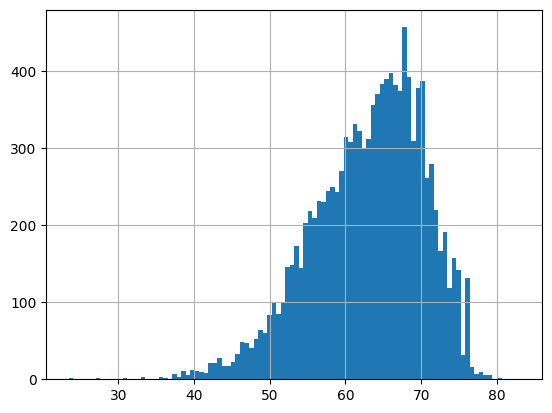

In [ ]:
# HISTOGRAMA ESTU_INSE_INDIVIDUAL
tabla_regresion["ESTU_INSE_INDIVIDUAL"].hist(bins = 100)

Puede observarse en el histograma que los valores menores a 30 no son representativos. La mayor concentración de valores se encuentra entre 50 y 70, lo que indica que la mayoría de los estudiantes provienen de familias de ingresos socioeconómicos medios. Una inclinación hacia la izquierda indica una subrepresentación de estudiantes de mayores ingresos, lo que puede reflejar desigualdad en el acceso a la educación. Las políticas educativas podrían centrarse en mejorar las oportunidades para los estudiantes de bajos ingresos, lo que tendría implicaciones importantes para reducir la desigualdad.

<Axes: >

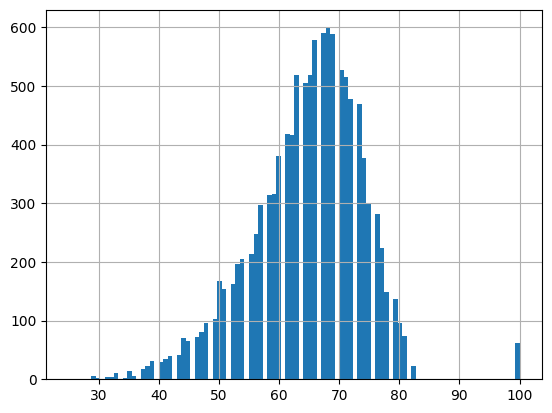

In [ ]:
#HISTOGRAMA PUNT_LECTURA_CRITICA
tabla_regresion["PUNT_LECTURA_CRITICA"].hist(bins = 100)

Se observa en el histograma que los valores entre 85 y 100 son no representativos.La mayoría de las puntuaciones están entre 50 y 80, con una distribución simétrica. Esto sugiere que el rendimiento en lectura crítica fue uniforme, sin diferencias importantes en el nivel de habilidad. Sin embargo, la falta de puntuaciones extremadamente altas puede indicar la necesidad de mejorar la enseñanza para fomentar habilidades de lectura crítica más avanzadas. Estadísticamente, se pueden recomendar modificaciones curriculares para apoyar el desarrollo de habilidades en esta área.

<Axes: >

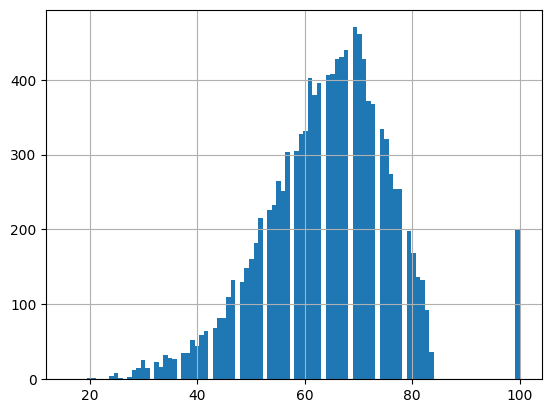

In [ ]:
#HISTOGRAMA PUNT_MATEMATICAS
tabla_regresion["PUNT_MATEMATICAS"].hist(bins = 100)

La concentración principal oscila entre 40 y 80, con un máximo de 70, lo que indica un rendimiento moderado, los valores entre 85 y 100 son no representativosAunque algunos estudiantes alcanzaron puntuaciones cercanas al máximo, la mayoría estuvieron en el promedio. Esto puede sugerir dificultades en la enseñanza de las matemáticas y, estadísticamente, resalta la necesidad de mejorar la comprensión avanzada. La baja dispersión de puntajes altos puede reflejar un desafío en la enseñanza de matemáticas que impide que los estudiantes sobresalgan.


<Axes: >

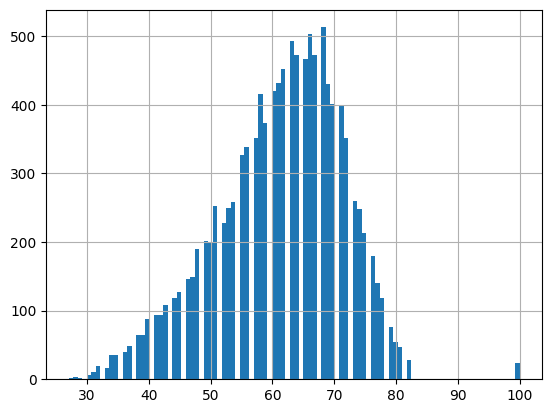

In [ ]:
#HISTOGRAMA PUNT_C_NATURALES
tabla_regresion["PUNT_C_NATURALES"].hist(bins = 100)

El rango de puntuación principal es de 50 a 70, lo que indica un rendimiento uniforme en ciencias naturales, los valores entre 85 y 100 son no representativos. Esta distribución centralizada puede significar que la prueba no distingue adecuadamente entre diferentes niveles de habilidades, lo que puede indicar la necesidad de adaptar tanto el plan de estudios como la prueba para permitir que los estudiantes sobresalgan. La falta de puntuaciones altas puede indicar que el sistema educativo necesita reforzar aspectos más avanzados de la materia.

<Axes: >

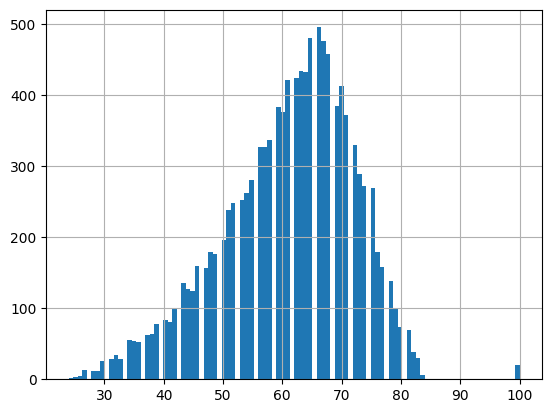

In [ ]:
#HISTOGRAMA PUNT_SOCIALES_CIUDADANAS
tabla_regresion["PUNT_SOCIALES_CIUDADANAS"].hist(bins = 100)

Puede observarse en el histograma que los valores entre 85 y 100 son no representativos. La mayoría de las puntuaciones se sitúan entre 50 y 80, con un máximo de 65. Esto indica un rendimiento moderado en ciencias sociales y educación cívica. Un máximo de 65 indica que el estudiante comprende conceptos básicos pero puede carecer de énfasis en el pensamiento crítico. Estadísticamente, este comportamiento implica que se deben reconsiderar los métodos educativos en este campo para ayudar a los estudiantes a analizar y obtener una comprensión más profunda de las cuestiones sociales y cívicas.

<Axes: >

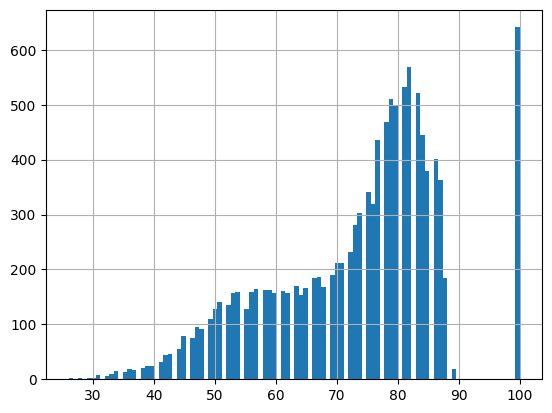

In [ ]:
#HISTOGRAMA PUNT_INGLES
tabla_regresion["PUNT_INGLES"].hist(bins = 100)

Este gráfico muestra una tendencia ascendente, con la mayoría de los puntajes concentrados entre 70 y 90, alcanzando un máximo de 100. Esto muestra que una gran cantidad de estudiantes dominan el inglés, y un grupo significativo logra el puntaje máximo. Sin embargo, la brecha entre 90 y 100 muestra que muy pocos estudiantes obtienen resultados excelentes, lo que puede indicar una oportunidad para mejorar las estrategias educativas para cerrar esta brecha, ayudando a los estudiantes a lograr un mayor dominio.


<Axes: >

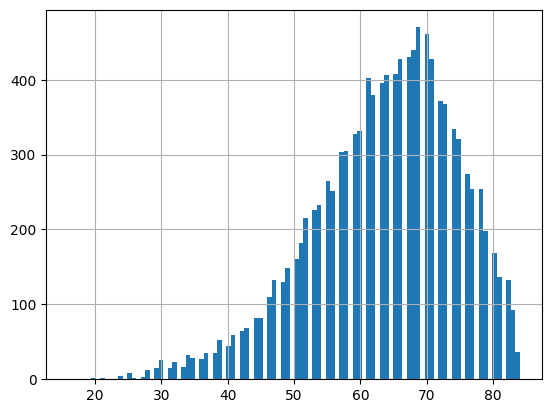

In [ ]:
PUNT_MATEMATICAS = tabla_regresion[(tabla_regresion["PUNT_MATEMATICAS"] < 100)]
PUNT_MATEMATICAS["PUNT_MATEMATICAS"].hist(bins  = 100)

Como en el cuadro de matemáticas anterior, la concentración de puntuaciones oscila entre 40 y 80, con un máximo de 70. Esto refuerza la observación de que la mayoría de los estudiantes tienen un rendimiento promedio. Estadísticamente, la falta de dispersión en los puntajes altos sugiere la necesidad de revisar las estrategias de enseñanza para ayudar a los estudiantes a sobresalir en matemáticas, lo que tiene implicaciones importantes para la educación en ciencia y tecnología.

In [ ]:

tabla_regresion1 = tabla_regresion[(tabla_regresion["ESTU_INSE_INDIVIDUAL"] > 30) & (tabla_regresion["PUNT_LECTURA_CRITICA"] < 100)  &
                                   (tabla_regresion["PUNT_MATEMATICAS"] < 100) & (tabla_regresion["PUNT_C_NATURALES"] < 100) &
                                   (tabla_regresion["PUNT_SOCIALES_CIUDADANAS"] < 100) & (tabla_regresion["PUNT_INGLES"] < 100)]

tabla_regresion1.head(5)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,41.863163,45,41,41,27,58.0
4,51.223795,53,55,41,56,69.0
5,57.690401,63,38,60,59,45.0
6,39.984838,69,60,59,51,50.0
7,50.613232,57,68,74,61,52.0


# **Determinación de variables explicativas**



# ***Diagramas de dispersión y modelos de regresión lineal simple***

In [ ]:
# Implementamos un modelo de regresion lineal para hacer la recta de regresion tomando como variable explicativa PUNT_LECTURA_CRITICA
x = np.array(tabla_regresion1["PUNT_LECTURA_CRITICA"]).reshape(-1,1)
y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)  #Entrenamos el modelo con las variables de entrenamiento
pred_lineal0 = regresion0.predict(testx)  #Realizamos la predicción del modelo con la variable de validación

In [ ]:
# Implementamos el modelo de regresión lineal para todos los datos de las variables
x0 = np.array(tabla_regresion1["PUNT_LECTURA_CRITICA"]).reshape(-1,1)
y0 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
modelo_lineal01 = LinearRegression()
regresion01 = modelo_lineal01.fit(x0, y0)
pred_lineal01 = regresion01.predict(x0)

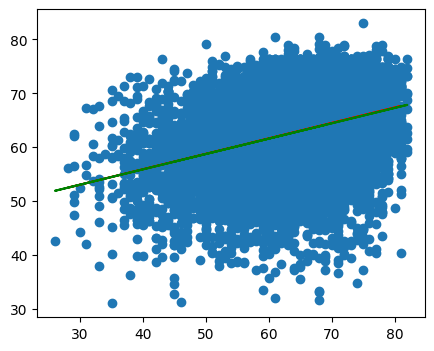

In [ ]:

plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
plt.plot(testx, pred_lineal0, linestyle='-', color = "red") #Recta de regresion dada por los datos de validacion
plt.plot(tabla_regresion1["PUNT_LECTURA_CRITICA"], pred_lineal01, linestyle='-', color = "green") #Recta de regresion dada por todos los datos
plt.show()



En el diagrama de dispersión se observa, una pequeña correlación entre la variable PUNT_LECTURA_CRITICA y la variable ESTU_INSE_INDIVIDUAL mostrando que no necesariamente depende una de la otra, puesto que la nube de puntos sin un patrón particular puede indicar independencia entre las variables. En cuanto a la recta de regresión lineal, se observa una pendiente ascendente indicando una correlación positiva entre las variables, es decir, a medida el puntaje de la prueba aumenta el INSE tiende también a aumentar.

In [ ]:
# Implementamos un modelo de regresion lineal para hacer la recta de regresion tomando como variable explicativa PUNT_MATEMATICAS
z = np.array(tabla_regresion1["PUNT_MATEMATICAS"]).reshape(-1,1)
w = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainz, testz, trainw, testw = train_test_split(z, w, test_size = 0.2, random_state = 0)
modelo_lineal02 = LinearRegression()
regresion02 = modelo_lineal02.fit(trainz, trainw)
pred_lineal02 = regresion02.predict(testz)

In [ ]:
# Implementamos el modelo de regresión lineal para todos los datos de las variables
z0 = np.array(tabla_regresion1["PUNT_MATEMATICAS"]).reshape(-1,1)
w0 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
modelo_lineal03 = LinearRegression()
regresion03 = modelo_lineal03.fit(z0, w0)
pred_lineal03 = regresion03.predict(z0)

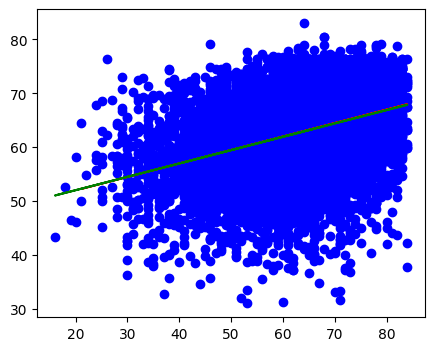

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"], c = "blue")
# plt.plot(tabla_regresion1["t_ges"], pred_lineal, linestyle='-', color = "red")
plt.plot(testz, pred_lineal02, linestyle='-', color = "red")
plt.plot(tabla_regresion1["PUNT_MATEMATICAS"], pred_lineal03, linestyle='-', color = "green")
plt.show()



Se observa una pequeña correlación positiva entre la variable PUNT_MATEMATICAS y la variable ESTU_INSE_INDIVIDUAL mostrando que no necesariamente son dependientes, puesto que la nube de puntos sin un patrón particular puede indicar independencia entre las variables, la variable PUNT_MATEMATICAS no es una variable explicativa. En cuanto a la recta de regresión lineal, se observa una pendiente ascendente indicando una correlación positiva entre las variables. Según lo anterior, el puntaje de la prueba de matemáticas no va a depender necesariamente del nivel socioeconómico del estudiante.

In [ ]:
# Implementamos un modelo de regresion lineal para hacer la recta de regresion tomando como variable explicativa PUNT_C_NATURALES
a = np.array(tabla_regresion1["PUNT_C_NATURALES"]).reshape(-1,1)
b = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
traina, testa, trainb, testb = train_test_split(a, b, test_size = 0.2, random_state = 0)
modelo_lineal04 = LinearRegression()
regresion04 = modelo_lineal04.fit(traina, trainb)
pred_lineal04 = regresion04.predict(testa)

In [ ]:
# Implementamos el modelo de regresión lineal para todos los datos de las variables
a0 = np.array(tabla_regresion1["PUNT_C_NATURALES"]).reshape(-1,1)
b0 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
modelo_lineal05 = LinearRegression()
regresion05 = modelo_lineal05.fit(a0, b0)
pred_lineal05 = regresion05.predict(a0)

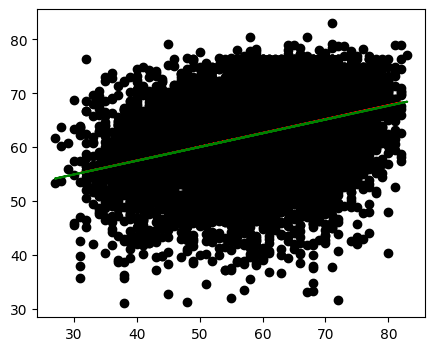

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["PUNT_C_NATURALES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"], c = "black")
plt.plot(testa, pred_lineal04, linestyle='-', color = "red")
plt.plot(tabla_regresion1["PUNT_C_NATURALES"], pred_lineal05, linestyle='-', color = "green")
plt.show()


El diagrama de dispersión muestra una nube de puntos sin patrón alguno, por tanto, las variables PUNT_C_NATURALES y ESTU_INSE_INDIVIDUAL no tienen relación, mostrando una correlación nula, debido a esto PUNT_C_NATURALES no es una variable explicativa. La línea de regresión tiene pendiente positiva la cual no se percibe muy grande, aun así muestra una correlación positiva.

In [ ]:
# Implementamos un modelo de regresion lineal para hacer la recta de regresion tomando como variable explicativa PUNT_SOCIALES_CIUDADANAS
c = np.array(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"]).reshape(-1,1)
d = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainc, testc, traind, testd = train_test_split(c, d, test_size = 0.2, random_state = 0)
modelo_lineal06 = LinearRegression()
regresion06 = modelo_lineal06.fit(trainc, traind)
pred_lineal06 = regresion06.predict(testc)

In [ ]:
# Implementamos el modelo de regresión lineal para todos los datos de las variables
c0 = np.array(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"]).reshape(-1,1)
d0 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
modelo_lineal07 = LinearRegression()
regresion07 = modelo_lineal05.fit(c0, d0)
pred_lineal07 = regresion07.predict(c0)

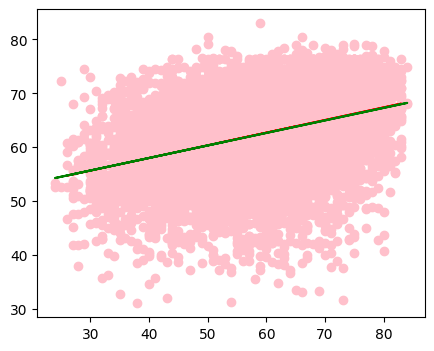

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"], c = "pink")
plt.plot(testc, pred_lineal06, linestyle='-', color = "red")
plt.plot(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], pred_lineal07, linestyle='-', color = "green")
plt.show()
plt.show()



El diagrama de dispersión muestra una nube de puntos sin patrón alguno, por tanto, las variables PUNT_SOCIALES_CIUDADANAS y ESTU_INSE_INDIVIDUAL no tienen relación, pues se está mostrando una correlación nula. La línea de regresión es ascendente mostrando una correlación positiva. Se podría confirmar que el puntaje en la prueba de sociales no depende del nivel socioecómico.

In [ ]:
# Implementamos un modelo de regresion lineal para hacer la recta de regresion tomando como variable explicativa PUNT_INGLES
e = np.array(tabla_regresion1["PUNT_INGLES"]).reshape(-1,1)
f = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
traine, teste, trainf, testf = train_test_split(e, f, test_size = 0.2, random_state = 0)
modelo_lineal08 = LinearRegression()
regresion08 = modelo_lineal08.fit(traine, trainf)
pred_lineal08 = regresion08.predict(teste)

In [ ]:
# Implementamos el modelo de regresión lineal para todos los datos de las variables
e0 = np.array(tabla_regresion1["PUNT_INGLES"]).reshape(-1,1)
f0 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
modelo_lineal09 = LinearRegression()
regresion09 = modelo_lineal05.fit(e0, f0)
pred_lineal09 = regresion09.predict(e0)

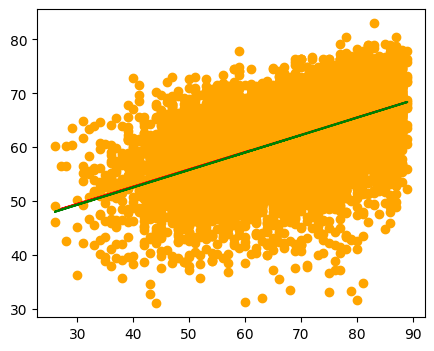

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"], c = "orange")
plt.plot(teste, pred_lineal08, linestyle='-', color = "red")
plt.plot(tabla_regresion1["PUNT_INGLES"], pred_lineal09, linestyle='-', color = "green")
plt.show()


En el diagrama de dispersión se observa como la nube de puntos si bien, no tiene un patrón partículas, van ascendiendo, denotando una correlación positiva un poco más marcada entre las variables PUNT_INGLES y ESTU_INSE_INDIVIDUAL (comparada con las anteriores gráficas). Ahora, la recta de regresión tiene una pendiente más pronunciada, más grande, dejando clara una relación fuerte entre dichas variables, con lo cual, PUNT_INGLES es una variable explicativa. De esta manera, la grafica permite determinar que, a medida que aumenta el nivel socio-económico, también aumenta el puntaje de la prueba; podría interpretarse que el acceso a una mejor calidad de educación permitiría que los resultados en las pruebas aumentaran.

# ***Coeficientes de correlación de Pearson, Spearman y Kendall***

In [ ]:
pearson_corr = np.corrcoef(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
pearman_corr, _ = spearmanr(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
kendall_corr, _ = kendalltau(tabla_regresion1["PUNT_LECTURA_CRITICA"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3391323759046912, 0.3373060372480936 y 0.23218636591510206.


Vemos que obtenemos correlaciones discretas (ya que los valores oscilan entre 0,2 y 0,4) con los tres coeficientes. Esto indica que la variable de respuesta ESTU_INSE_INDIVIDUAL y la variable PUNT_LECTURA_CRITICA no están correlacionadas significativamente y por tanto determina que PUNT_LECTURA_CRITICA no es una variable explicativa.

Otro análisis: En este caso, los tres coeficientes muestran una correlación discreta entre POINT_LECTURA_CRITICA y ESTU_INSE_INDIVIDUAL. Estas correlaciones separadas sugieren que no existe una relación fuerte entre el desempeño en lectura crítica y los niveles socioeconómicos individuales de los estudiantes. Esto puede deberse a que las habilidades de lectura crítica se desarrollan de manera más independiente de las condiciones socioeconómicas o a que factores externos como la calidad de la educación, la motivación personal y los recursos externos influyen en ellas de manera desigual. Además, el coeficiente de Kendall es el más bajo de los tres coeficientes, lo que indica que la correlación observada es más sensible a las relaciones no lineales o al ordenamiento relativo de los datos, lo que sugiere una relación de no linealidad simple.

In [ ]:
pearson_corr1 = np.corrcoef(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
pearman_corr1, _ = spearmanr(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
kendall_corr1, _ = kendalltau(tabla_regresion1["PUNT_MATEMATICAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr1}, {pearman_corr1} y {kendall_corr1}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.36521204750058567, 0.3746918787400376 y 0.2578607683390751.


Observamos que nuevamente obtenemos una correlación discreta con tres coeficientes. Esto indica que la variable de respuesta ESTU_INSE_INDIVIDUAL y la variable PUNT_MATEMATICAS no están correlacionadas significativamente y por lo tanto determina que PUNT_MATEMATICAS no es una variable explicativa.

Análisis adicional: Aunque los coeficientes muestran una correlación discreta, la relación entre PUNT_MATEMATICAS y ESTU_INSE_INDIVIDUAL parece ser ligeramente más fuerte que en el caso de lecturas significativas. Esto puede reflejar una mayor dependencia de los recursos educativos y de tutoría disponibles, que a menudo están correlacionados con el nivel socioeconómico. Las matemáticas tienden a ser un campo en el que la educación formal, el acceso a la tecnología, los libros y la orientación personal juegan papeles importantes, lo que explicaría esta correlación más amplia. Sin embargo, debido a que la correlación sigue siendo fragmentaria, esto sugiere que otros factores no medidos también influyen en el rendimiento en matemáticas.

In [ ]:
pearson_corr2 = np.corrcoef(tabla_regresion1["PUNT_C_NATURALES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
pearman_corr2, _ = spearmanr(tabla_regresion1["PUNT_C_NATURALES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
kendall_corr2, _ = kendalltau(tabla_regresion1["PUNT_C_NATURALES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr2}, {pearman_corr2} y {kendall_corr2}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3420599397412001, 0.3445265546503091 y 0.23643052666402903.


Observamos que obtenemos correlaciones discretas con tres coeficientes. Esto indica que la variable respuesta ESTU_INSE_INDIVIDUAL y la variable PUNT_C_NATURALES no están correlacionadas significativamente y por lo tanto, se determina que PUNT_C_NATURALES no es una variable explicativa.

Análisis adicional: Como en los casos anteriores, los coeficientes muestran correlación discreta. El desempeño en ciencias naturales parece estar influenciado por el nivel socioeconómico, aunque esta relación no es lo suficientemente fuerte como para considerarse decisiva. Puede ser que el interés por la ciencia y los recursos externos como museos, documentales y el acceso a actividades extracurriculares sean más difíciles para los estudiantes de entornos socioeconómicos bajos. Además, esto puede contribuir a esta pequeña correlación. Sin embargo, la correlación no es lo suficientemente alta como para demostrar que los puntajes en ciencias naturales dependen en gran medida de variables socioeconómicas.



In [ ]:
pearson_corr3 = np.corrcoef(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
pearman_corr3, _ = spearmanr(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
kendall_corr3, _ = kendalltau(tabla_regresion1["PUNT_SOCIALES_CIUDADANAS"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr3}, {pearman_corr3} y {kendall_corr3}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.34006314034261026, 0.3418930612936367 y 0.23483503538564543.


Observamos que obtenemos correlaciones discretas con tres coeficientes. Esto indica que la variable respuesta ESTU_INSE_INDIVIDUAL y la variable PUNT_SOCIALES_CIUDADANAS no están correlacionadas significativamente y por lo tanto se determina que PUNT_SOCIALES_CIUDADANAS no es una variable explicativa.

Otro análisis: Este resultado sigue el patrón observado en otros sujetos. La correlación entre las puntuaciones en ciencias sociales y el nivel socioeconómico individual es esporádica. La educación en estudios sociales, que a menudo incluye historia y educación cívica, puede estar menos influenciada por factores económicos que materias como matemáticas o ciencias. Esto sugiere que, aunque puede haber diferencias en el acceso a los recursos, los estudiantes de diferentes niveles socioeconómicos pueden tener oportunidades similares para desarrollar conocimientos en este campo. Esta relación es moderada y puede implicar que el entorno socioeconómico tiene un impacto moderado pero no decisivo en la comprensión de las cuestiones sociales.

In [ ]:
pearson_corr4 = np.corrcoef(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])[0, 1]
pearman_corr4, _ = spearmanr(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
kendall_corr4, _ = kendalltau(tabla_regresion1["PUNT_INGLES"], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr4}, {pearman_corr4} y {kendall_corr4}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.5561165390166269, 0.564464654714314 y 0.39433072015893483.


Observamos que logramos correlaciones moderadas con los coeficientes de Pearson y Spearman y correlaciones discretas con los coeficientes de Kendall. Esto indica que la variable de respuesta ESTU_INSE_INDIVIDUAL y la variable PUNT_INGLES están significativamente correlacionadas y por lo tanto se determina que PUNT_INGLES es la variable explicativa.

Otro análisis: Aquí encontramos correlaciones moderadas con los coeficientes de Pearson y Spearman, mientras que el coeficiente de Kendall muestra una correlación discreta, aunque superior a la de los casos anteriores. Esto sugiere que el nivel socioeconómico tiene una influencia más notable en la habilidad en inglés. Esto puede deberse a que los estudiantes de niveles socioeconómicos más altos tienden a tener acceso a recursos como lecciones privadas, viajes al extranjero o exposición regular al idioma a través de medios como películas, música y libros en inglés. La correlación observada refleja el hecho de que el aprendizaje de lenguas extranjeras puede depender más de los recursos disponibles, especialmente fuera del aula

## ***Coeficientes de determinación***

In [ ]:
X = tabla_regresion1.drop("ESTU_INSE_INDIVIDUAL", axis = 1)  #X contiene las VARIABLES EXPLICATIVAS
Y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]  #Y contiene la VARIABLE DE RESPUESTA

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0) # trainX: datos de entrenamiento de X, testX: datos de validacion de X
# test_size = 0.2 indica que se toman el 80% de los datos como datos de entrenamiento y el 20% como datos de validación
trainX.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
8248,59,56,47,47,67.0
4675,72,73,68,62,71.0
6214,75,76,77,75,83.0
12034,68,71,71,59,81.0


In [ ]:
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)   # Este es el modelo lineal ajustado a los datos de entrenamiento
pred_lineal = regresion.predict(testX)  #La predicción es la esperanza de que la variable respuesta tenga cierto valor
#dados los valores de las variables explicativas

In [ ]:
#Coeficiente de determinación (con todas las variables como explicativas), se usa para determinar qué tan bueno es nuestro modelo,
#por ello se usan los datos de validación
r2_lineal = regresion.score(testX, testY)
r2_lineal

0.3073902306159586

In [ ]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0


In [ ]:
#Aquí se toma que 'PUNT_LECTURA_CRITICA' NO es una variable explicativa
X1 = tabla_regresion1[['PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y1 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train1X, test1X, train1Y, test1Y = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)
train1X.head(4)

,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
8248,56,47,47,67.0
4675,73,68,62,71.0
6214,76,77,75,83.0
12034,71,71,59,81.0


In [ ]:
#Coeficiente de determinación sin el puntaje en lectura critica
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(train1X, train1Y)
pred_lineal1 = regresion1.predict(test1X)
r2_lineal1 = regresion1.score(test1X, test1Y)
r2_lineal1

0.30617829955704934

In [ ]:
#Aquí se toma que 'PUNT_MATEMATICAS' NO es una variable explicativa
X2 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y2 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train2X, test2X, train2Y, test2Y = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(train2X, train2Y)
r2_lineal2 = regresion2.score(test2X, test2Y)
r2_lineal2

0.30707208858552193

In [ ]:
#Aquí se toma que 'PUNT_C_NATURALES' NO es una variable explicativa
X3 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
Y3 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train3X, test3X, train3Y, test3Y = train_test_split(X3, Y3, test_size = 0.2, random_state = 0)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(train3X, train3Y)
r2_lineal3 = regresion3.score(test3X, test3Y)
r2_lineal3

0.30740096035841713

In [ ]:
#Aquí se toma que 'PUNT_SOCIALES_CIUDADANAS' NO es una variable explicativa
X4 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_INGLES']]
Y4 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train4X, test4X, train4Y, test4Y = train_test_split(X4, Y4, test_size = 0.2, random_state = 0)
modelo_lineal4 = LinearRegression()
regresion4 = modelo_lineal4.fit(train4X, train4Y)
r2_lineal4 = regresion4.score(test4X, test4Y)
r2_lineal4

0.3076778513593663

In [ ]:
#Aquí se toma que 'PUNT_INGLES' NO es una variable explicativa
X5 = tabla_regresion1[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS']]
Y5 = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
train5X, test5X, train5Y, test5Y = train_test_split(X5, Y5, test_size = 0.2, random_state = 0)
modelo_lineal5 = LinearRegression()
regresion5 = modelo_lineal5.fit(train5X, train5Y)
r2_lineal5 = regresion5.score(test5X, test5Y)
r2_lineal5

0.13258852112941444

Se toman como variables explicativas el puntaje obtenido en lectura crítica (PUNT_LECTURA_CRITICA), el puntaje obtenido en matemáticas (PUNT_MATEMATICAS), el puntaje obtenido en ciencias naturales (PUNT_C_NATURALES), el puntaje obtenido en sociales y ciudadanas (PUNT_SOCIALES_CIUDADANAS), el puntaje obtenido en inglés (PUNT_INGLES) y la variable respuesta es el índice socioeconómico del evaluado (ESTU_INSE_INDIVIDUAL), se observa que el coeficiente de determinación es igual a  0.3073902306159586 .
Por otro lado, el coeficiente de determinación toma el siguiente valor cuando no se toma como variable explicativa a:
* PUNT_LECTURA_CRITICA es  0.30617829955704934
* PUNT_MATEMATICAS es  0.30707208858552193
* PUNT_C_NATURALES es  0.30740096035841713
* PUNT_SOCIALES_CIUDADANAS es  0.3076778513593663
* PUNT_INGLES es  0.13258852112941444

Note que, las variables PUNT_LECTURA_CRITICA, PUNT_MATEMATICAS, PUNT_C_NATURALES y PUNT_SOCIALES_CIUDADANAS se aproximan al coeficiente de determinación, afirmando que NO son explicativas, ya que al omitirlas el valor del coeficiente de determinación presenta una variación muy pequeña con respecto al valor respuesta de cada una, por tanto, las variables no cambian significativamente el ajuste del modelo.
Mientras que la variable PUNT_INGLES tiene un valor 0.13258852112941444, presentando una alteración en el valor del coeficiente de determinación respuesta al no incluirla como variable explicativa, por lo que SI es una variable explicativa y puede cambiar el ajuste del modelo.
Confirmando así la interpretación dada en el diagrama de dispersión, el puntaje de la prueba de ingles tiene una relación con el nivel socioeconómico.











# ***Diagrama con plano de dispersión y modelo de regresión lineal múltiple***


Para realizar el plano de dispersión, seleccionaremos las dos variables más explicativas, las cuales corresponden a PUNT_INGLES y PUNT_LECTURA_CRITICA, ya que los valores de los coeficientes de determinación sin incluirlas son los más alejados del valor del coeficiente al incluir todas las variables, menos la de respuesta, lo cual indica que al no tomarlas como explicativas se produce el mayor desajuste del modelo.

In [ ]:
XY, Z = tabla_regresion1[["PUNT_LECTURA_CRITICA", "PUNT_INGLES"]], tabla_regresion1["ESTU_INSE_INDIVIDUAL"] #XY contiene las variables explicativas y
# Z la variable respuesta
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2, random_state = 0)
trainXY.head(4)

,PUNT_LECTURA_CRITICA,PUNT_INGLES
8248,59,67.0
4675,72,71.0
6214,75,83.0
12034,68,81.0


In [ ]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ) #Entrenamos el modelo con los datos de entrenamiento

LinearRegression()

In [ ]:
modelo1.score(testXY, testZ)  #Coeficiente de determinación para los datos de validacion

0.30755201571932844

El coeficiente de determinación (R²) de 0,3075 indica que aproximadamente el 30,8% de la variación de la variable respuesta ESTU_INSE_INDIVIDUAL puede explicarse por las dos variables seleccionadas: PUNT_LECTURA_CRITICA y PUNT_INGLES. Si bien este valor no es alto, muestra que estas variables explican una parte significativa de la diferencia en los niveles socioeconómicos de los estudiantes.

El hecho de que el valor R² sea similar al obtenido al incluir todas las variables en el modelo sugiere que otras variables (como PUNT_MATEMATICAS, PUNT_C_NATURALES, etc.) no aportan mucha información adicional para explicar ESTU_INSE_INDIVIDUAL. Esto refuerza la idea de que CRITICAL_READING SCORE y ENGLISH SCORE son los factores principales del modelo, mientras que otras variables pueden proporcionar información redundante o irrelevante.

In [ ]:
array = modelo1.coef_  #Determinamos los coeficientes del modelo de regresión.
array

array([-0.01883163,  0.32957276])

El coeficiente asociado a PUNT_LECTURA_CRITICA es -0,01883, lo que indica una relación negativa muy débil entre esta variable y ESTU_INSE_INDIVIDUAL. En otras palabras, los aumentos en las puntuaciones de lectura crítica tienen un impacto insignificante y negativo en los niveles socioeconómicos de los individuos, lo cual es un resultado sorprendente. Este coeficiente puede reflejar efectos secundarios o interacciones con otras variables no incluidas en el modelo, o puede indicar que el efecto de las puntuaciones de lectura crítica no es tan relevante como se esperaba en términos de impacto socioeconómico.

El coeficiente asociado con PUNT_INGLES es 0,32957, lo que implica que el aumento de las puntuaciones en inglés se asocia con un aumento positivo en el nivel socioeconómico del individuo. Este valor muestra que el dominio del inglés puede ser un factor importante para acceder a mejores oportunidades educativas o profesionales, lo que está estrechamente relacionado con un aumento de los indicadores socioeconómicos. El coeficiente positivo y más alto para el inglés refuerza la idea de que el idioma es una herramienta clave para mejorar el acceso a recursos que pueden elevar los niveles socioeconómicos de los estudiantes.

Intersección: La intersección del modelo es prácticamente insignificante (-0,01883), lo que indica que cuando todas las variables explicativas son cero, el valor predicho de ESTU_INSE_INDIVIDUAL será cercano a cero, lo que no es muy relevante en la práctica en este caso.

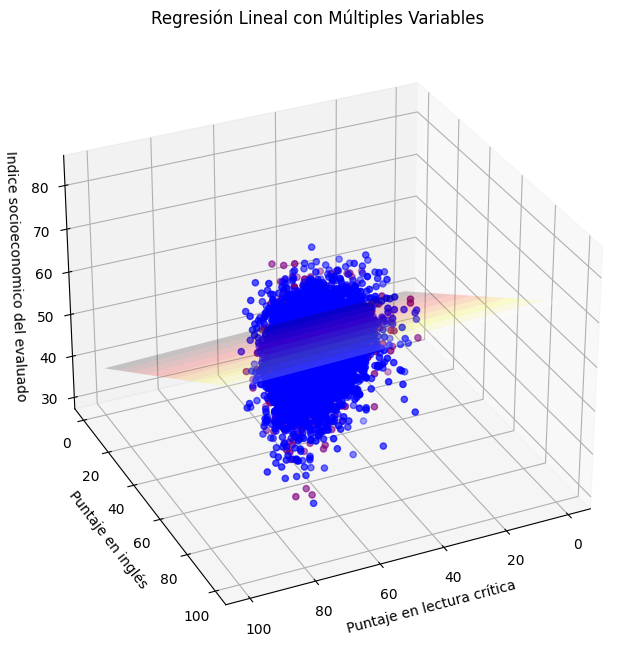

In [ ]:
# En este bloque se realiza la malla de la gráfica. En el eje X ubicamos la variable PUNT_LECTURA_CRITICA
# y en el eje Y la variable PUNT_INGLES
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(0, 100, num=10), np.linspace(0, 100, num=10))  # Establecemos los valores que deben tomar los ejes de acuerdo
# con los histogramas de PUNT_LECTURA_CRITICA y PUNT_INGLES
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

# En este bloque se realiza el plano de regresión del modelo y el diagrama de dispersión
ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY["PUNT_LECTURA_CRITICA"], trainXY["PUNT_INGLES"], trainZ, c='blue',s=20)  #Gráfico de los datos de entrenamiento
ax.scatter(testXY["PUNT_LECTURA_CRITICA"], testXY["PUNT_INGLES"], testZ, c='purple',s=20)   #Gráfico de los datos de validación
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Puntaje en lectura crítica')
ax.set_ylabel('Puntaje en inglés')
ax.set_zlabel('Indice socioeconomico del evaluado')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

Dada la gráfica y los datos obtenidos en la línea anterior, se observa una pendiente positiva, una recta ligeramente inclinada hacia arriba indicando que por cada punto que aumente el puntaje en inglés y el puntaje en lectura crítica, el nivel socio-económico también aumenta en aproximadamente 0.33 unidades, lo que confirma que hay una correlación positiva pero no es muy fuerte.

En cuanto a la dispersión de los puntos, se observa una nube de puntos en donde los datos de entrenamiento son más dispersos y se alejan del plano de regresión, por lo que esto no nos permite tener una adecuada percepción de la correlación entre las variables puntaje en inglés y puntaje en lectura crítica respecto al indice de nivel socioeconómico.

Por tanto, se puede decir que el tener un nivel socioeconómico alto permite acceder a una "mejor calidad" de educación, acceso a material educativo y por lo tanto un mejor puntaje en inglés, variable que predomina a lo largo del presente trabajo.

# ***Implementación de una red neuronal multicapa***

Debido a que el coeficiente de determinación bajo el modelo de regresión lineal (simple y múltiple) fue de aproximadamente el *30.7% < 80%* se puede afirmar que este no es un modelo que se ajuste correctamente a los datos. Por ello, a continuación se usará un modelo de red neuronal de perceptrón multicapa

In [ ]:
#Implementación de la red neuronal para 6 capas de 100 nodos cada una
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100),
                  max_iter = 500,
                  activation = 'relu',
                  solver = 'adam',
                  learning_rate = 'invscaling')
red.fit(trainX,trainY)

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100),
             learning_rate='invscaling', max_iter=500)

In [ ]:
red.score(testX, testY)  #Coeficiente de determinación bajo el modelo de red neuronal

0.299469652337198

El coeficiente de determinación (R²) obtenido es del 29,94%, lo que demuestra que la red neuronal solo explica el 29,94% de la varianza de la variable respuesta ESTU_INSE_INDIVIDUAL en los datos de la prueba. Este número es incluso menor que los resultados obtenidos de los modelos de regresión lineal.

Desde un punto de vista estadístico, este resultado muestra que la red neuronal no captura las relaciones entre variables de manera efectiva. Aunque es capaz de realizar modelos no lineales, el rendimiento deficiente puede deberse a varios factores:

Sobreajuste: es posible que la red haya aprendido demasiado bien los datos de entrenamiento pero no haya generalizado bien los datos de prueba, lo que reduce su previsibilidad.
Redundancia de variables: es posible que algunas variables no proporcionen suficiente información para mejorar la capacidad predictiva del modelo, lo que sugiere que un proceso de selección de variables más exhaustivo puede mejorar el rendimiento.
Cantidad de datos: las redes neuronales requieren grandes cantidades de datos para explotar plenamente sus capacidades de modelado no lineal. Si los datos disponibles son limitados, es posible que el modelo no capture suficiente información para mejorar significativamente los métodos lineales.
Estadísticamente, esto muestra que, aunque las redes neuronales son más flexibles que la regresión lineal, no siempre garantizan un mejor ajuste, especialmente cuando los datos disponibles no contienen relaciones sólidas con un sistema altamente no lineal o no son suficientes para entrenar completamente el modelo.



In [ ]:
X.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0


In [ ]:
# Se realiza la predicción del valor de la variable respuesta dados ciertos valores de las variables explicativas
no_obs = np.array([[60, 3, 15, 50, 100]])
print('Se espera que el índice socioeconómico del evaluado sea', red.predict(no_obs), 'bajo el perceptrón multicapa y ',
      modelo_lineal.predict(no_obs), "bajo el modelo de regresión lineal múltiple.")

Se espera que el índice socioeconómico del evaluado sea [73.4663021] bajo el perceptrón multicapa y  [70.16020152] bajo el modelo de regresión lineal múltiple.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


La diferencia en la predicción entre los dos modelos es muy pequeña, lo que refuerza la idea de que los dos modelos capturan tendencias similares en los datos. Estadísticamente, esto indica que la relación entre las variables explicativas y las variables de respuesta puede no ser lo suficientemente compleja como para justificar el uso de un modelo más avanzado, como una red neuronal.

La red neuronal predice valores ligeramente más altos que el modelo de regresión lineal, lo que puede deberse a su capacidad para capturar pequeñas no linealidades. Sin embargo, debido al bajo coeficiente de determinación de ambos modelos, estas predicciones deben interpretarse con cautela porque los modelos no explican la mayor parte de la variación de los datos. Esto sugiere que pueden faltar variables explicativas importantes o que las variables existentes no tienen una relación lo suficientemente fuerte con ESTU_INSE_INDIVIDUAL.

#***Imputación***

A continuación, se tomará la base de datos con los datos faltantes en la variable de respuesta ESTU_INSE_INDIVIDUAL para realizar la imputación con la predicción de los valores de esta variable (teniendo los valores de las variables explicativas PUNT_LECTURA_CRITICA, PUNT_MATEMATICAS, PUNT_C_NATURALES, PUNT_SOCIALES_CIUDADANAS y PUNT_INGLES) bajo el modelo que mejor se ajustó a los datos

In [ ]:
icfes_connan = datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
 (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
 (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
 (~datos_icfes['PUNT_C_NATURALES'].isna()) &
 (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
 (~datos_icfes['PUNT_INGLES'].isna())]

In [ ]:
tabla_regresion2 = icfes_connan[['ESTU_INSE_INDIVIDUAL','PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']]
tabla_regresion2.head(10)

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
35,NaN,67,52,56,62,52.0
63,NaN,63,62,70,62,57.0
84,NaN,44,36,46,48,46.0
183,NaN,54,65,46,59,55.0
201,NaN,57,40,44,67,50.0
205,NaN,58,60,61,33,57.0
221,NaN,59,53,52,41,68.0
232,NaN,41,55,44,38,57.0
257,NaN,72,78,77,81,78.0
258,NaN,74,71,75,77,85.0


<Axes: >

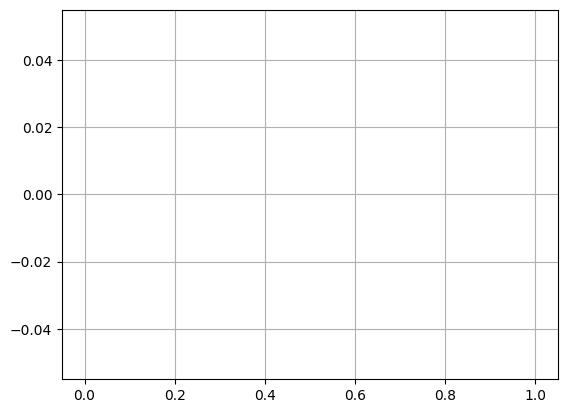

In [ ]:
tabla_regresion2["ESTU_INSE_INDIVIDUAL"].hist(bins = 100)

In [ ]:
X_no = tabla_regresion2.drop("ESTU_INSE_INDIVIDUAL", axis = 1)  #Variables explicativas de la tabla de regesión con valores faltantes
Y_no = tabla_regresion2["ESTU_INSE_INDIVIDUAL"]  #Variable de respuesta


Realizaremos la predicción de los valores que se esperan obtener en la variable ESTU_INSE_INDIVIDUAL a partir de los valores de las demás variables explicativas. Calcularemos estos valores esperados usando el modelo de red neuronal de perceptrón multicapa establecido anterioremente.

In [ ]:
red.predict(X_no)

array([59.07675649, 59.13113055, 54.72130246, 58.63647649, 56.36693293,
       60.35717535, 61.99368345, 57.05380069, 66.76134296, 68.73821628,
       77.16066997, 64.98062854, 65.02467545, 59.16487737, 65.23111601,
       58.81510171, 58.73876942, 61.45542793, 59.97061408, 64.46993722,
       65.05673281, 59.81017477, 57.2351415 , 55.87000539, 57.2471035 ,
       58.15731996, 59.38339309, 62.07426691, 58.73601615, 56.23470991,
       65.16406453, 64.28328501, 60.5201529 , 65.60704163, 58.35612168,
       65.75847541, 59.99473842, 56.11877169, 60.03875881, 58.9412982 ,
       65.00967475, 54.17585187, 63.14282973, 67.01268695, 63.50696961,
       61.29305585, 58.17250514, 56.2732162 , 57.91776638, 56.19861171,
       61.03553866, 63.43502491, 63.8155891 , 55.47190749, 55.40418982,
       61.14265178, 67.07854479, 58.88895895, 60.97278913, 61.50607457,
       57.18965457, 66.99924005, 72.59619253, 62.95311405, 66.47561857,
       60.33854481, 61.54454985, 57.98505677, 62.97593611, 55.96

Finalmente, realizamos la imputación de los datos faltantes con los valores obtenidos en la predicción del modelo de red neuronal.

In [ ]:
tabla_regresion2["ESTU_INSE_INDIVIDUAL"] = red.predict(X_no)
tabla_regresion2

,ESTU_INSE_INDIVIDUAL,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
35,59.076756,67,52,56,62,52.0
63,59.131131,63,62,70,62,57.0
84,54.721302,44,36,46,48,46.0
183,58.636476,54,65,46,59,55.0
201,56.366933,57,40,44,67,50.0
...,...,...,...,...,...,...
12618,65.671717,68,57,54,70,82.0
12629,64.411874,59,66,55,64,76.0
12656,56.389288,57,54,50,37,50.0
12658,66.060552,53,64,51,49,83.0


Una vez se ha dado la predicción a través de la imputación, los datos que se obtienen se comparan con la "tabla_regresion = icfes_sin_nan" (línea 9); se observa que si bien la predicción es aproximada, dichos valores son superiores y/o están por arriba. Esto puede llegar a afectar la correlación entre las variables estudiadas, los coeficientes y la determinación de las variables explicativas y no explicativas.

Otra metodología estadística que se podría usar es la imputación por “regresión estocástica”, en donde los
datos faltantes se obtienen con un modelo de regresión más un valor aleatorio asociado que proviene de la distribución de errores del modelo de regresión.Dicho procedimiento garantiza una imputación más realista que tenga en cuanta la variabilidad de los datos.

# ***Conclusiones***

Relaciones entre variables: El análisis muestra que las variables PUNT_LECTURA_CRITICA y PUNT_INGLES son las mejores explicaciones para predecir el índice socioeconómico (ESTU_INSE_INDIVIDUAL). Otras variables, aunque importantes, no tuvieron un impacto estadísticamente significativo en la predicción del nivel socioeconómico de los estudiantes.


Modelos predictivos: El coeficiente de determinación en el modelo de regresión lineal y la red neuronal multicapa es aproximadamente del 30%, lo que indica que estos modelos no capturan completamente la relación entre variables. Esto sugiere que puede haber factores no medidos que influyen en el nivel socioeconómico o que los datos disponibles no permiten un ajuste más preciso.


Correlación entre puntajes y nivel socioeconómico: Los coeficientes de correlación de Pearson, Spearman y Kendall mostraron correlaciones discretas entre la mayoría de las variables de puntuación y los indicadores socioeconómicos, excepto PUNT_INGLES, que mostró correlaciones moderadas. Esto sugiere que el dominio del inglés está más relacionado con el nivel socioeconómico, quizás porque los estudiantes de niveles más altos tienen mejor acceso a recursos educativos de calidad.


Implicaciones educativas: Los hallazgos resaltan la importancia de mejorar las oportunidades educativas, especialmente en el área de inglés, donde los estudiantes de mayor nivel socioeconómico tienden a tener un mejor desempeño. Se pueden implementar políticas para cerrar estas brechas, brindando más apoyo y recursos a los estudiantes de menor rendimiento.

##***Referencias***
I. y P. M. (s.f.). Estudios estadísticos y prospectivos. Cepal.org. Recuperado el 21 de octubre de 2024, de https://repositorio.cepal.org/server/api/core/bitstreams/02dd479f-fae2-43c4-b5ec-5419fa7f6190/content

Universidad de Valencia. (s.f.). Valores faltantes. Recuperado el 22 de octubre de 2024, de https://www.uv.es/webgid/Descriptiva/23_valores_faltantes.html

Instituto Colombiano para la Evaluación de la Educación. ICFES. (s.f.). Saber al detalle. Serie de publicaciones. Recuperado el 18 de octubre de 2024, de https://www.icfes.gov.co/saber-al-detalle/#:~:text=Saber%20al%20detalle.%20Serie%20de%20publicaciones

Ríos, A.  (2024, 01 octubre). Regresión lineal múltiple en Python. [Video]. YouTube. https://www.youtube.com/watch?v=9kJIRrbQFlE&t=1s


Ríos, A.  (2024, 01 octubre). Regresión lineal múltiple en Python parte 2. [Video]. YouTube. https://www.youtube.com/watch?v=0RvRcDCmP4o&t=1s
